In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)
# print(torch.cuda.is_available())

2.9.1+cu130


# Introduction to Tensors

## Creating tensors
Multi-dimensional matrix containing elements of a single data type

In [2]:
# Scalar
scalar = torch.tensor(7)
print(scalar)

tensor(7)


In [3]:
scalar.ndim

0

In [4]:
# Convert scalar to Python number
scalar.item()

7

In [5]:
# Vector
vector = torch.tensor([7, 7])
print(vector)

tensor([7, 7])


In [6]:
vector.ndim

1

In [7]:
vector.shape

torch.Size([2])

In [8]:
# MATRIX
MATRIX = torch.tensor([[7, 8], [9, 10]])
print(MATRIX)

tensor([[ 7,  8],
        [ 9, 10]])


In [9]:
MATRIX.ndim

2

In [10]:
MATRIX.shape

torch.Size([2, 2])

In [11]:
MATRIX[0]

tensor([7, 8])

In [12]:
MATRIX[1][0]

tensor(9)

In [13]:
# TENSOR
TENSOR = torch.tensor([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]], [[13, 14, 15], [16, 17, 18]]])
print(TENSOR)

tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[ 7,  8,  9],
         [10, 11, 12]],

        [[13, 14, 15],
         [16, 17, 18]]])


In [14]:
TENSOR.ndim

3

In [15]:
TENSOR.shape

torch.Size([3, 2, 3])

In [16]:
TENSOR[0]

tensor([[1, 2, 3],
        [4, 5, 6]])

In [17]:
TENSOR[1][0]

tensor([7, 8, 9])

In [18]:
TENSOR[2][1][0]

tensor(16)

In [19]:
TENSOR1 = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7,  8]]])
print(TENSOR1)

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])


In [20]:
TENSOR1.ndim

3

In [21]:
TENSOR1.shape

torch.Size([2, 2, 2])

### Random Tensors

Q. Why random tensors?
A. They are important because the way many neural networks learn is that they start with tensors full of random numbers, and then adjust those random numbers to better represent the data.

`Start with random numbers -> look at data -> update random numbers -> look at data -> update random numbers -> ...`

In [22]:
# Create a random tensor of size (3, 4)
random_tensor = torch.rand(3, 4)
print(random_tensor)

tensor([[0.3083, 0.4471, 0.9953, 0.3536],
        [0.2363, 0.8834, 0.9727, 0.0482],
        [0.6713, 0.5093, 0.2077, 0.1644]])


In [23]:
# Create a random tensor with similar shape to an image tensor
random_image_tensor = torch.rand(size=(3, 224, 224))  # color channels (R G B), height, width
print(random_image_tensor.shape)

torch.Size([3, 224, 224])


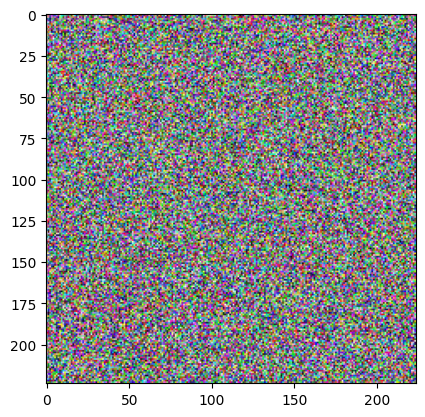

In [24]:
# displays a random image
plt.imshow(random_image_tensor.permute(1, 2, 0))  # permute changes the order of dimensions

### Zeros and ones

In [25]:
# Tensor of all zeros
zeros = torch.zeros(size=(3, 4))
print(zeros)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


In [26]:
zeros * random_tensor

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [27]:
## Tensor of all ones
ones = torch.ones(size=(3, 4))
print(ones)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [28]:
ones.dtype

torch.float32

In [29]:
random_tensor.dtype

torch.float32

### Create range of tensors and tensors-like

In [30]:
# Use torch.arange() to create a tensor of sequential numbers
one_to_ten = torch.arange(1, 11, 1) # torch.arange(start=1, end=11, step=1)
one_to_ten

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [31]:
# Tensors-like objects
ten_zeros = torch.zeros_like(input=one_to_ten)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Tensor datatypes

Ensure tensors are:
- Of right datatype
- Of right shape
- On the right device

In [32]:
# Float 32
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                        dtype=None, # could be torch.float16, torch.float32, torch.float64
                        device=None, # could be 'cuda' for GPU, default is 'cpu'
                        requires_grad=False) # whether to track gradients for optimization
float_32_tensor.dtype

torch.float32

In [33]:
float_16_tensor = float_32_tensor.type(torch.float16)
float_16_tensor.dtype

torch.float16

In [34]:
float_16_tensor * float_32_tensor # PyTorch will upcast the lower bit tensor to the higher bit tensor

tensor([ 9., 36., 81.])

In [35]:
int_32_tensor = torch.tensor([3, 6, 9], dtype=torch.int32)
int_32_tensor

tensor([3, 6, 9], dtype=torch.int32)

In [36]:
float_32_tensor * int_32_tensor # PyTorch will upcast the integer tensor to float tensor

tensor([ 9., 36., 81.])

### Getting information/attributes from tensors

- tensor.dtype
- tensor.shape
- tensor.device

In [37]:
# Create a tensor
sample_tensor = torch.arange(1., 10.)
sample_tensor

tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [38]:
# Find details
sample_tensor.ndim, sample_tensor.shape, sample_tensor.dtype, sample_tensor.device

(1, torch.Size([9]), torch.float32, device(type='cpu'))

In [39]:
print(f"Datatype of tensor: {sample_tensor.dtype}")
print(f"Shape of tensor: {sample_tensor.shape}")
print(f"Numel of tensor: {sample_tensor.numel()}")
print(f"Size of tensor: {sample_tensor.size()}")
print(f"Device of tensor: {sample_tensor.device}")

Datatype of tensor: torch.float32
Shape of tensor: torch.Size([9])
Numel of tensor: 9
Size of tensor: torch.Size([9])
Device of tensor: cpu


In [40]:
# another_tensor = torch.rand(3, 4, dtype=torch.float16, device='cuda')
# another_tensor

In [41]:
# print(f"Datatype of another_tensor: {another_tensor.dtype}")
# print(f"Shape of another_tensor: {another_tensor.shape}")
# print(f"Numel of another_tensor: {another_tensor.numel()}")
# print(f"Device of another_tensor: {another_tensor.device}")

### Manipulating Tensors (operations)
- Addition
- Subtraction
- Multiplication (element-wise)
- Division
- Matrix multiplication (dot product)

In [ ]:
# Create tensor and add 100 to it
tensor = torch.tensor([1, 2, 3])
tensor + 100

tensor([101, 102, 103])

In [43]:
# Create tensor and multiple 10 to it
tensor = torch.tensor([1, 2, 3])
tensor * 10

tensor([10, 20, 30])

In [44]:
# Create tensor and subtract 5 from it
tensor = torch.tensor([1, 2, 3])
tensor - 5

tensor([-4, -3, -2])

In [46]:
# PyTorch in-built functions
tensor = torch.tensor([1, 2, 3])
torch.add(tensor, 10), torch.mul(tensor, 10), torch.sub(tensor, 5)

(tensor([11, 12, 13]), tensor([10, 20, 30]), tensor([-4, -3, -2]))

### Matrix multiplication

Two rules:
- **Inner dimensions** must match
- Result matrix has the shape of the **outer dimensions**

In [54]:
# Element wise multiplication
print(tensor, "*", tensor, "=", tensor*tensor)

tensor([1, 2, 3]) * tensor([1, 2, 3]) = tensor([1, 4, 9])


In [ ]:
# Matrix multiplication
print(torch.matmul(tensor.unsqueeze(0), tensor.unsqueeze(1)))  # unsqueeze adds an extra dimension

print(torch.matmul(tensor, tensor)) # tensor @ tensor, torch.mm(tensor, tensor))

tensor([[14]])
tensor(14)


In [52]:
%%time
value = 0
for i in range(len(tensor)):
    value += tensor[i] * tensor[i]
print(value)

tensor(14)
CPU times: total: 0 ns
Wall time: 772 μs


In [53]:
%%time
print(torch.matmul(tensor, tensor))

tensor(14)
CPU times: total: 0 ns
Wall time: 361 μs


### Shape errors: One of the most common in deep learning

In [57]:
torch.matmul(torch.rand(2, 5), torch.rand(size=(2, 5)))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x5 and 2x5)

### Manipulate the shape of a tensor
- Transpose: switches the axes or dimensions of a given tensor

In [64]:
tensor_B = torch.tensor([[1, 2],
                         [4, 5],
                        [7, 8]])
print(tensor_B)
print(tensor_B.shape)

tensor([[1, 2],
        [4, 5],
        [7, 8]])
torch.Size([3, 2])


In [65]:
print(tensor_B.T, tensor_B.T.shape)

tensor([[1, 4, 7],
        [2, 5, 8]]) torch.Size([2, 3])


In [67]:
tensor_A = torch.tensor([[1, 2, 3],
                         [4, 5, 6]])
tensor_A

tensor([[1, 2, 3],
        [4, 5, 6]])

In [68]:
torch.mm(tensor_B, tensor_A)

tensor([[ 9, 12, 15],
        [24, 33, 42],
        [39, 54, 69]])

In [69]:
# Create tensor and divide by 2
tensor = torch.tensor([1, 2, 3])
tensor / 2

tensor([0.5000, 1.0000, 1.5000])

### Tensor aggregation

In [71]:
# Create a tensor
tensor = torch.arange(1, 100, 10)

In [72]:
# Min
tensor.min(), torch.min(tensor)

(tensor(1), tensor(1))

In [73]:
# Max
tensor.max(), torch.max(tensor)

(tensor(91), tensor(91))

In [75]:
# Find the mean - Mean requires tensor of float type
tensor.float().mean(), torch.mean(tensor.float())

(tensor(46.), tensor(46.))

In [76]:
# Find the sum
tensor.sum(), torch.sum(tensor)

(tensor(460), tensor(460))

### Positional min and max
Position in tensor which has min or max element

In [77]:
# argmin
tensor.argmin(), torch.argmin(tensor)

(tensor(0), tensor(0))

In [78]:
# argmax
tensor.argmax(), torch.argmax(tensor)

(tensor(9), tensor(9))

### Reshaping, viewing, squeezing, unsqueezing, and stacking
- Reshaping: changes the shape of input tensor
- Viewing: return a view of input tensor in a certain shape but keep the same memory as the original tensor
- Stacking: combine multiple tensors by different dimensions
- Squeeze: removes all `1` dimensions from a tensor
- Unsqueeze: adds a `1` dimension to a target tensor
- Permute: returns a view of the input with dimensions permuted in a certain way

In [86]:
# Create a tensor
x = torch.arange(1., 10.)
x

tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [87]:
x.shape

torch.Size([9])

In [88]:
# Add a dimension
x_reshaped = x.reshape(1, 9)
x_reshaped.shape, x_reshaped
# x.reshape(1, 7) -> does not work, 9 ele cannot be reshaped to 7

(torch.Size([1, 9]), tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]))

In [93]:
# Change the view
z = x.view(1, 9)
z.shape, z, x

(torch.Size([1, 9]),
 tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [94]:
# Changing z changes x, as the view shares the same memory as the input
z[:, 0] = 5
z, x

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [95]:
# Stack tensors on top of each other
tensor_A = torch.tensor([1, 2, 3])
tensor_B = torch.tensor([4, 5, 6])
stacked_tensor = torch.stack([tensor_A, tensor_B])
stacked_tensor.shape, stacked_tensor

(torch.Size([2, 3]),
 tensor([[1, 2, 3],
         [4, 5, 6]]))

In [103]:
# Stack along dim 1 (vertical axis)
hstacked_tensor = torch.stack([tensor_A, tensor_B], dim=1)
hstacked_tensor.shape, hstacked_tensor

(torch.Size([3, 2]),
 tensor([[1, 4],
         [2, 5],
         [3, 6]]))

In [104]:
torch.vstack([tensor_A, tensor_B])

tensor([[1, 2, 3],
        [4, 5, 6]])

In [105]:
torch.hstack([tensor_A, tensor_B]) # Stack tensors horizontally

tensor([1, 2, 3, 4, 5, 6])

In [106]:
horizontally_stacked_tensor = torch.cat([tensor_A, tensor_B], dim=0)
horizontally_stacked_tensor.shape, horizontally_stacked_tensor

(torch.Size([6]), tensor([1, 2, 3, 4, 5, 6]))

In [107]:
# Squeezees all single dimensions
tensor_C = torch.zeros(size=(1, 3, 1, 4, 1))
tensor_C.shape, tensor_C.squeeze().shape, tensor_C.squeeze()

(torch.Size([1, 3, 1, 4, 1]),
 torch.Size([3, 4]),
 tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]))

In [109]:
# Unsqueezees a dimension at specified dimension
tensor_D = torch.tensor([1, 2, 3, 4])
tensor_D.shape, tensor_D.unsqueeze(0).shape, tensor_D.unsqueeze(1).shape

(torch.Size([4]), torch.Size([1, 4]), torch.Size([4, 1]))